# Wine Reviews - Homework 2

[GitHub](https://github.com/rslx/Course-DM)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [4]:
dataCount = data.shape[0]

## 数据集处理

根据对数据集的观察，选择 `country`（`C`）、`points`（`E`）、`price`（`P`）、`taster_twitter_handle`（`T`）、`variety`（`V`）这几列数据，其它列数据不采用。

将这些数据转换为前缀标签，例如，`country` 值为“Italy”的转换为 `C:Italy` 标签。每个标签赋予一个唯一的 ID。然后，每行数据均转换为 5 个 ID 组成的数组。

In [5]:
marks = {}  # id->identifier
marksR = {} # identifier->id
LP = {1:{}}
D = []

In [6]:
def initM(row,col,prefix):
    k = prefix+":"+str(data[col][row])
    if k in marksR:
        mid = marksR[k]
        LP[1][mid] += 1
    else:
        mid = len(marks)+1
        marks[mid] = k
        marksR[k] = mid
        LP[1][mid] = 1
    return mid

In [7]:
for i in range(len(data)):
    d = []
    d.append(initM(i,"country","C"))
    d.append(initM(i,"points","E"))
    d.append(initM(i,"price","P"))
    d.append(initM(i,"taster_twitter_handle","T"))
    d.append(initM(i,"variety","V"))
    D.append(d)

以下展示前 10 行数据转换为标签 ID 后的形式。

In [8]:
D[:10]

[[1, 2, 3, 4, 5],
 [6, 2, 7, 8, 9],
 [10, 2, 11, 12, 13],
 [10, 2, 14, 15, 16],
 [10, 2, 17, 12, 18],
 [19, 2, 7, 20, 21],
 [1, 2, 22, 4, 23],
 [24, 2, 25, 8, 26],
 [27, 2, 28, 15, 26],
 [24, 2, 29, 8, 13]]

## 频繁模式

设定最低支持度计数为 6500，大约相当于 5%。

In [9]:
minsup = 6500

In [10]:
L = {1:[]}
for u in LP[1].keys():
    if (LP[1][u]<minsup):
        continue
    L[1].append([[u], LP[1][u]])

In [11]:
len(L[1])

25

发现了 25 个 1 项频繁集。这个数量比较适宜于后续计算。

In [12]:
def descM(m):
    s = marks[m[0]]
    for i in range(1,len(m)):
        s += ", " + marks[m[i]]
    return s
def printF(k):
    for l in sorted(L[k], key=lambda x:x[1], reverse=True):
        print(str(l[1]) + " - " + descM(l[0]))

In [13]:
printF(1)

54504 - C:US
31213 - T:nan
25514 - T:@vossroger
22093 - C:France
19540 - C:Italy
17207 - E:88
16933 - E:87
15410 - E:90
15134 - T:@wineschach
13272 - V:Pinot Noir
12600 - E:86
12226 - E:89
11753 - V:Chardonnay
11359 - E:91
10776 - T:@kerinokeefe
9613 - E:92
9537 - T:@vboone
9532 - T:@paulgwine 
9530 - E:85
9472 - V:Cabernet Sauvignon
8996 - P:nan
8946 - V:Red Blend
6940 - P:20.0
6915 - V:Bordeaux-style Red Blend
6645 - C:Spain


In [14]:
def hasInfrequentSubset(c,k):
    return False # Todo

In [15]:
def aprioriGen(k):
    C = []
    for l1 in L[k-1]:
        for l2 in L[k-1]:
            passed = True
            for i in range(0,k-3):
                if (l1[0][i]!=l2[0][i]):
                    passed = False
                    break
            if not passed or not l1[0][k-2]<l2[0][k-2]:
                continue
            c = np.unique(l1[0]+l2[0])
            if not hasInfrequentSubset(c,k):
                C.append(c)
    return C

In [16]:
def apriori():
    for k in range(2,999):
        if not len(L[k-1])>0:
            break
        L[k] = []
        C = aprioriGen(k)
        print(str(k)+" 项频繁集候选项数："+str(len(C)))
        tmp = 0
        for c in C:
            count = 0
            tmp += 1
            for d in D:
                passed = True
                for mid in c:
                    if not d.count(mid)>0:
                        passed = False
                        break
                if not passed:
                    continue
                count += 1
            if count<minsup:
                continue
            L[k].append([c,count])
        print(str(k)+" 项频繁集数："+str(len(L[k])))

In [17]:
apriori()

2 项频繁集候选项数：300
2 项频繁集数：13
3 项频繁集候选项数：77
3 项频繁集数：0


发现了 13 个 2 项频繁集，没有 3 项以上频繁集。
1 项频繁集已经在上面输出过。2 项频繁集如下。

In [18]:
printF(2)

19763 - C:US, T:nan
18602 - T:@vossroger, C:France
10776 - C:Italy, T:@kerinokeefe
9885 - C:US, V:Pinot Noir
9537 - C:US, T:@vboone
9303 - C:US, T:@paulgwine 
8498 - C:Italy, T:nan
7315 - C:US, V:Cabernet Sauvignon
7039 - C:US, E:88
6801 - C:US, V:Chardonnay
6708 - C:US, E:90
6632 - E:87, C:US
6575 - C:Spain, T:@wineschach


## 关联规则

根据发现的 13 个 2 项频繁集，可以写出以下关联规则：

In [19]:
def getS(k,m):
    for l in L[k]:
        if (l[0]==m).all():
            return l[1]

In [20]:
A = []
for l in L[2]:
    A.append([l[0][0], l[0][1], getS(2,l[0])/dataCount, getS(2,l[0])/getS(1,l[0][0])])
    A.append([l[0][1], l[0][0], getS(2,l[0])/dataCount, getS(2,l[0])/getS(1,l[0][1])])
A.sort(key=lambda x:x[3], reverse=True)
for a in A:
    print("支持度 %.4f\t置信度 %.4f\t%s → %s"%(a[2],a[3],marks[a[0]],marks[a[1]]))

支持度 0.0829	置信度 1.0000	T:@kerinokeefe → C:Italy
支持度 0.0734	置信度 1.0000	T:@vboone → C:US
支持度 0.0506	置信度 0.9895	C:Spain → T:@wineschach
支持度 0.0716	置信度 0.9760	T:@paulgwine  → C:US
支持度 0.1431	置信度 0.8420	C:France → T:@vossroger
支持度 0.0563	置信度 0.7723	V:Cabernet Sauvignon → C:US
支持度 0.0761	置信度 0.7448	V:Pinot Noir → C:US
支持度 0.1431	置信度 0.7291	T:@vossroger → C:France
支持度 0.1521	置信度 0.6332	T:nan → C:US
支持度 0.0523	置信度 0.5787	V:Chardonnay → C:US
支持度 0.0829	置信度 0.5515	C:Italy → T:@kerinokeefe
支持度 0.0516	置信度 0.4353	E:90 → C:US
支持度 0.0654	置信度 0.4349	C:Italy → T:nan
支持度 0.0506	置信度 0.4345	T:@wineschach → C:Spain
支持度 0.0542	置信度 0.4091	E:88 → C:US
支持度 0.0510	置信度 0.3917	E:87 → C:US
支持度 0.1521	置信度 0.3626	C:US → T:nan
支持度 0.0654	置信度 0.2723	T:nan → C:Italy
支持度 0.0761	置信度 0.1814	C:US → V:Pinot Noir
支持度 0.0734	置信度 0.1750	C:US → T:@vboone
支持度 0.0716	置信度 0.1707	C:US → T:@paulgwine 
支持度 0.0563	置信度 0.1342	C:US → V:Cabernet Sauvignon
支持度 0.0542	置信度 0.1291	C:US → E:88
支持度 0.0523	置信度 0.1248	C:US → V:Chardonnay
支持度 0.05

## 规则评价

In [21]:
for i in range(len(A)):
    A[i].append(A[i][3]/(getS(1,a[1])/dataCount))
    A[i].append(A[i][2]/(max(getS(1,a[0]),getS(1,a[1]))/dataCount))
A.sort(key=lambda x:x[5], reverse=True)
for a in A:
    print("Lift %.4f\t全置信度 %.4f\t%s → %s"%(a[4],a[5],marks[a[0]],marks[a[1]]))

Lift 4.8599	全置信度 0.3626	T:nan → C:US
Lift 2.7832	全置信度 0.3626	C:US → T:nan
Lift 6.4628	全置信度 0.3413	C:France → T:@vossroger
Lift 5.5962	全置信度 0.3413	T:@vossroger → C:France
Lift 7.6756	全置信度 0.1977	T:@kerinokeefe → C:Italy
Lift 4.2330	全置信度 0.1977	C:Italy → T:@kerinokeefe
Lift 5.7168	全置信度 0.1814	V:Pinot Noir → C:US
Lift 1.3921	全置信度 0.1814	C:US → V:Pinot Noir
Lift 7.6756	全置信度 0.1750	T:@vboone → C:US
Lift 1.3431	全置信度 0.1750	C:US → T:@vboone
Lift 7.4912	全置信度 0.1707	T:@paulgwine  → C:US
Lift 1.3101	全置信度 0.1707	C:US → T:@paulgwine 
Lift 3.3381	全置信度 0.1559	C:Italy → T:nan
Lift 2.0897	全置信度 0.1559	T:nan → C:Italy
Lift 5.9277	全置信度 0.1342	V:Cabernet Sauvignon → C:US
Lift 1.0301	全置信度 0.1342	C:US → V:Cabernet Sauvignon
Lift 3.1399	全置信度 0.1291	E:88 → C:US
Lift 0.9913	全置信度 0.1291	C:US → E:88
Lift 4.4416	全置信度 0.1248	V:Chardonnay → C:US
Lift 0.9578	全置信度 0.1248	C:US → V:Chardonnay
Lift 3.3412	全置信度 0.1231	E:90 → C:US
Lift 0.9447	全置信度 0.1231	C:US → E:90
Lift 3.0062	全置信度 0.1217	E:87 → C:US
Lift 0.9340	全置信度 0.1

较有意义的关联规则包括："@vossroger" 较有可能品尝法国的酒、"Pinot Noir" 较有可能产自美国，等。

## 支持度与置信度

Text(0, 0.5, 'confidence')

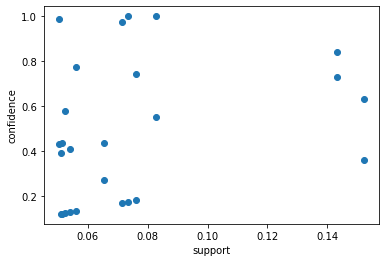

In [26]:
plt.scatter(list(map(lambda x:x[2],A)), list(map(lambda x:x[3],A)))
plt.xlabel("support")
plt.ylabel("confidence")